<a href="https://colab.research.google.com/github/gibranfp/CursoAprendizajeAutomatizado/blob/2024-2/notebooks/3a_validacion_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selección de modelos
En esta libreta evaluaremos modelos de clasificación usando valación cruzada.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.metrics import average_precision_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import PrecisionRecallDisplay

np.random.seed(42)

## Validación cruzada
Definimos la función para realizar validación cruzada de $K$ particiones.

In [2]:
def vc_kpart(X, y, k = 5):
  n = X.shape[0]
  t_pliegue = int(n / k)
  for i in range(k):
    masc_val = np.zeros(n, dtype=bool)
    masc_val[t_pliegue * i:t_pliegue * (i + 1)] = True
    masc_ent = np.logical_not(masc_val)
    X_ent = X[masc_ent]
    y_ent = y[masc_ent]
    X_val = X[masc_val]
    y_val = y[masc_val]

    yield i, X_ent, y_ent, X_val, y_val

Nota que en la función anterior, para algunos valores de K no se utilizaría una parte del conjunto debido al tamaño del pliegue requerido.

Creamos un pequeño conjunto de datos para probar nuestra función.

In [3]:
Xs = np.array(range(1, 11))
ys = -np.array(range(1, 11))
print(Xs, ys)

[ 1  2  3  4  5  6  7  8  9 10] [ -1  -2  -3  -4  -5  -6  -7  -8  -9 -10]


Realizamos validación cruzada de K particiones de este conjunto usando la función que definimos anteriormente.

In [4]:
for i, Xs_ent, ys_ent, Xs_val, ys_val in vc_kpart(Xs, ys, k=5):
  print(f'{i}: Xent = {Xs_ent} yent = {ys_ent} Xval = {Xs_val} yval = {ys_val}')

0: Xent = [ 3  4  5  6  7  8  9 10] yent = [ -3  -4  -5  -6  -7  -8  -9 -10] Xval = [1 2] yval = [-1 -2]
1: Xent = [ 1  2  5  6  7  8  9 10] yent = [ -1  -2  -5  -6  -7  -8  -9 -10] Xval = [3 4] yval = [-3 -4]
2: Xent = [ 1  2  3  4  7  8  9 10] yent = [ -1  -2  -3  -4  -7  -8  -9 -10] Xval = [5 6] yval = [-5 -6]
3: Xent = [ 1  2  3  4  5  6  9 10] yent = [ -1  -2  -3  -4  -5  -6  -9 -10] Xval = [7 8] yval = [-7 -8]
4: Xent = [1 2 3 4 5 6 7 8] yent = [-1 -2 -3 -4 -5 -6 -7 -8] Xval = [ 9 10] yval = [ -9 -10]


De forma similar, definimos la función para realizar validación cruzada aleatoria.

In [5]:
def vc_aleatorio(X, y, r = 10, t_ent=0.8):
  n = X.shape[0]
  for i in range(r):
    perm = np.random.permutation(n)

    Xperm = X[perm]
    yperm = y[perm]

    X_ent = Xperm[:int(n * t_ent)]
    y_ent = yperm[:int(n * t_ent)]

    X_val = Xperm[int(n * t_ent):]
    y_val = yperm[int(n * t_ent):]

    yield i, X_ent, y_ent, X_val, y_val

Probamos esta función con el mismo conjunto.

In [6]:
for i, Xs_ent, ys_ent, Xs_val, ys_val in vc_aleatorio(Xs, ys, r=10):
  print(f'{i}: Xent = {Xs_ent} yent = {ys_ent} Xval = {Xs_val} yval = {ys_val}')

0: Xent = [ 9  2  6  1  8  3 10  5] yent = [ -9  -2  -6  -1  -8  -3 -10  -5] Xval = [4 7] yval = [-4 -7]
1: Xent = [ 1  2  9  6  4  5  8 10] yent = [ -1  -2  -9  -6  -4  -5  -8 -10] Xval = [7 3] yval = [-7 -3]
2: Xent = [10  3  1  7  9  6  4  8] yent = [-10  -3  -1  -7  -9  -6  -4  -8] Xval = [2 5] yval = [-2 -5]
3: Xent = [2 8 7 3 9 1 4 5] yent = [-2 -8 -7 -3 -9 -1 -4 -5] Xval = [ 6 10] yval = [ -6 -10]
4: Xent = [2 6 5 9 1 8 7 4] yent = [-2 -6 -5 -9 -1 -8 -7 -4] Xval = [ 3 10] yval = [ -3 -10]
5: Xent = [ 9  3  6  8  4  2 10  1] yent = [ -9  -3  -6  -8  -4  -2 -10  -1] Xval = [5 7] yval = [-5 -7]
6: Xent = [1 6 3 7 4 8 5 2] yent = [-1 -6 -3 -7 -4 -8 -5 -2] Xval = [ 9 10] yval = [ -9 -10]
7: Xent = [ 5  9  2  4  1  6  3 10] yent = [ -5  -9  -2  -4  -1  -6  -3 -10] Xval = [8 7] yval = [-8 -7]
8: Xent = [ 3  1  5 10  9  7  8  6] yent = [ -3  -1  -5 -10  -9  -7  -8  -6] Xval = [2 4] yval = [-2 -4]
9: Xent = [5 3 8 1 7 4 6 9] yent = [-5 -3 -8 -1 -7 -4 -6 -9] Xval = [10  2] yval = [-10  -2

Validación de K particiones con repetición.

In [7]:
def vcrep_kpart(X, y, r=2, k=5):
  n = X.shape[0]
  t_pliegue = int(n / k)
  for i in range(r):
    perm = np.random.permutation(n)
    Xperm = X[perm]
    yperm = y[perm]
    for j in range(k):
      masc_val = np.zeros(n, dtype=bool)
      masc_val[t_pliegue*j:t_pliegue*(j+1)] = True
      masc_ent = np.logical_not(masc_val)
      X_ent = Xperm[masc_ent]
      y_ent = yperm[masc_ent]
      X_val = Xperm[masc_val]
      y_val = yperm[masc_val]

      yield i, j, i * k + j, X_ent, y_ent, X_val, y_val

Probamos la validación cruzada de K particiones repetida.

In [8]:
for i, j, l, Xs_ent, ys_ent, Xs_val, ys_val in vcrep_kpart(Xs, ys, k=5, r=2):
  print(f'{i}, {j}, {l}: Xent = {Xs_ent} yent = {ys_ent} Xval = {Xs_val} yval = {ys_val}')

0, 0, 0: Xent = [ 8  4  1  9 10  7  2  5] yent = [ -8  -4  -1  -9 -10  -7  -2  -5] Xval = [6 3] yval = [-6 -3]
0, 1, 1: Xent = [ 6  3  1  9 10  7  2  5] yent = [ -6  -3  -1  -9 -10  -7  -2  -5] Xval = [8 4] yval = [-8 -4]
0, 2, 2: Xent = [ 6  3  8  4 10  7  2  5] yent = [ -6  -3  -8  -4 -10  -7  -2  -5] Xval = [1 9] yval = [-1 -9]
0, 3, 3: Xent = [6 3 8 4 1 9 2 5] yent = [-6 -3 -8 -4 -1 -9 -2 -5] Xval = [10  7] yval = [-10  -7]
0, 4, 4: Xent = [ 6  3  8  4  1  9 10  7] yent = [ -6  -3  -8  -4  -1  -9 -10  -7] Xval = [2 5] yval = [-2 -5]
1, 0, 5: Xent = [ 3  5  4  8 10  7  9  1] yent = [ -3  -5  -4  -8 -10  -7  -9  -1] Xval = [2 6] yval = [-2 -6]
1, 1, 6: Xent = [ 2  6  4  8 10  7  9  1] yent = [ -2  -6  -4  -8 -10  -7  -9  -1] Xval = [3 5] yval = [-3 -5]
1, 2, 7: Xent = [ 2  6  3  5 10  7  9  1] yent = [ -2  -6  -3  -5 -10  -7  -9  -1] Xval = [4 8] yval = [-4 -8]
1, 3, 8: Xent = [2 6 3 5 4 8 9 1] yent = [-2 -6 -3 -5 -4 -8 -9 -1] Xval = [10  7] yval = [-10  -7]
1, 4, 9: Xent = [ 2  6  3

## Curva ROC
Para evaluar los modelos de clasificación usaremos el área bajo la curva Receiver Operating Characteristic (ROC), la cual obtenemos de la siguiente manera:

In [9]:
def roc(probabilities, y):
  # obtenemos los indices de las predicciones ordenadas de menor a mayor probabilidad
  orden = np.argsort(probabilities)[::-1]

  # ordenamos predicciones y valores reales
  porden = probabilities[orden]
  yorden = y[orden]

  # Nos quedamos únicamente con los índices repetidos
  idxs = np.unique(porden, return_index = True)[1][::-1]

  rvps = yorden[idxs].cumsum()
  rfps = 1.0 + idxs - rvps

  n_pos = y.sum()
  n_neg = y.shape[0] - n_pos

  return rvps / n_pos, rfps / n_neg

Podemos calcular el áre bajo la curva ROC usando usando la [_fórmula de shoelace_](https://en.wikipedia.org/wiki/Shoelace_formula).

In [10]:
def area_poligono(vertices):
  area = 0.0
  n_vert = len(vertices)
  for i in range(n_vert - 1):
    area = area + vertices[i][0] * vertices[i + 1][1]
    area = area - vertices[i + 1][0] * vertices[i][1]

  area = area + vertices[n_vert - 1][0] * vertices[0][1]
  area = area - vertices[0][0] * vertices[n_vert - 1][1]

  return 0.5 * abs(area)

def compute_aucroc(tfp, tvp):
  auc = 0.0
  fprev = 0.0
  vprev = 0.0
  for i,(f,v) in enumerate(zip(tfp, tvp)):
    auc += area_poligono([[fprev, 0], [fprev, vprev], [f, v], [f, 0]])
    fprev = f
    vprev = v

  return auc

Descargamos el conjunto de datos de [ATLAS Higgs Challenge](http://opendata.cern.ch/record/328).


Nota: si tienes problemas con el servidor del CERN, puedes descargar el archivo `training.zip` manualmente de [Kaggle](https://www.kaggle.com/competitions/higgs-boson), extraerlo, renombrar el archivo CSV a `atlas-higgs-challenge-2014-v2.csv` (o modificar la siguiente celda para que lea `training.csv`) y ponerlo en el directorio donde se está ejecutando la libreta (en Colab sería `/content/`).

In [11]:
!wget http://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz
!gunzip -c atlas-higgs-challenge-2014-v2.csv.gz > atlas-higgs-challenge-2014-v2.csv

--2024-03-12 00:28:32--  http://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65630848 (63M) [application/octet-stream]
Saving to: ‘atlas-higgs-challenge-2014-v2.csv.gz’

atlas-higgs-challen 100%[===================>]  62.59M   932KB/s    in 65s     

2024-03-12 00:29:37 (992 KB/s) - ‘atlas-higgs-challenge-2014-v2.csv.gz’ saved [65630848/65630848]



Leemos el archivo CSV y mostramos los primeros registros.

In [12]:
higgs = pd.read_csv('atlas-higgs-challenge-2014-v2.csv', na_values=-999.0)
higgs.head(5)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,0.725,1.158,NaN,NaN,NaN,46.226,0.681042,b,t,2.233584
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,2.053,-2.028,NaN,NaN,NaN,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,NaN,NaN,NaN,NaN,NaN,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,NaN,NaN,NaN,NaN,NaN,0.000,1.904263,b,t,6.245333


Podemos observar que hay varios valores faltantes (`NaN`), calculamos el porcentaje de faltantes de cada variable.

In [13]:
faltantes = higgs.isnull().sum() * 100 / len(higgs)
print(faltantes)

EventId                         0.000000
DER_mass_MMC                   15.228088
DER_mass_transverse_met_lep     0.000000
DER_mass_vis                    0.000000
DER_pt_h                        0.000000
DER_deltaeta_jet_jet           70.914942
DER_mass_jet_jet               70.914942
DER_prodeta_jet_jet            70.914942
DER_deltar_tau_lep              0.000000
DER_pt_tot                      0.000000
DER_sum_pt                      0.000000
DER_pt_ratio_lep_tau            0.000000
DER_met_phi_centrality          0.000000
DER_lep_eta_centrality         70.914942
PRI_tau_pt                      0.000000
PRI_tau_eta                     0.000000
PRI_tau_phi                     0.000000
PRI_lep_pt                      0.000000
PRI_lep_eta                     0.000000
PRI_lep_phi                     0.000000
PRI_met                         0.000000
PRI_met_phi                     0.000000
PRI_met_sumet                   0.000000
PRI_jet_num                     0.000000
PRI_jet_leading_

Para los atributos descartamos `EventId`, `Weight`, `KaggleSet`, `KaggleWeight` y `Label`.

In [14]:
features = [
            'DER_mass_MMC',
            'DER_mass_transverse_met_lep',
            'DER_mass_vis',
            'DER_pt_h',
            'DER_deltaeta_jet_jet',
            'DER_mass_jet_jet',
            'DER_prodeta_jet_jet',
            'DER_deltar_tau_lep',
            'DER_pt_tot',
            'DER_sum_pt',
            'DER_pt_ratio_lep_tau',
            'DER_lep_eta_centrality',
            'PRI_tau_pt',
            'PRI_tau_eta',
            'PRI_lep_pt',
            'PRI_lep_eta',
            'PRI_met',
            'PRI_met_sumet',
            'PRI_jet_num',
            'PRI_jet_leading_pt',
            'PRI_jet_leading_eta',
            'PRI_jet_subleading_pt',
            'PRI_jet_subleading_eta',
            'PRI_jet_all_pt'
            ]

Graficamos el número de instancias por cada clase (columna `Label`).

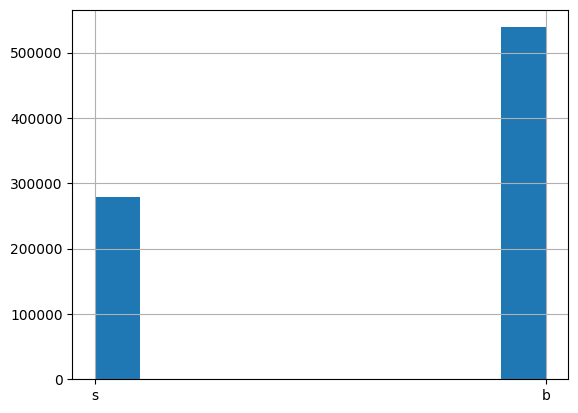

In [15]:
higgs['Label'].hist()
plt.show()

Tomamos los valores de esos atributos como un arreglo de NumPy. Convertimos los valores b y s de la columna `Label` a 0 y 1 respectivamente.

In [16]:
X = higgs[features].to_numpy()
y = np.zeros(len(higgs['Label'].to_numpy())).astype(int)
y[higgs['Label'].to_numpy() == 's'] = 1

Dividimos el conjunto completo en subconjuntos de entrenamiento y prueba.

In [17]:
Xe, X_prueba, ye, y_prueba = train_test_split(X,
                                              y,
                                              test_size=0.3,
                                              random_state=42)

Realizamos validación cruzada para regresión logística con distintos valores de $\alpha$ en la clase `SGDClassifier` de scikit-learn ($\lambda$) usando el subconjunto de entrenamiento, calculando promedios y desviaciones estándar de las métrica para cada valor.

In [18]:
n_rep = 5
n_pliegues = 4

alfas = np.logspace(-4.0, -2.0, num=10)
aucroc = np.zeros((alfas.shape[0], n_rep * n_pliegues))
aucpr = np.zeros((alfas.shape[0], n_rep * n_pliegues))
acc = np.zeros((alfas.shape[0], n_rep * n_pliegues))
prec = np.zeros((alfas.shape[0], n_rep * n_pliegues))
recall = np.zeros((alfas.shape[0], n_rep * n_pliegues))
f1 = np.zeros((alfas.shape[0], n_rep * n_pliegues))
for j, k, l, X_ent, y_ent, X_val, y_val in vcrep_kpart(Xe, ye, r=n_rep, k=n_pliegues):
  for i,a in enumerate(alfas):
    imp = SimpleImputer(strategy='mean')
    imp.fit(X_ent)
    X_ent = imp.transform(X_ent)

    sc = StandardScaler()
    X_ent = sc.fit_transform(X_ent)

    m = SGDClassifier(loss='log_loss', penalty='l1', alpha=a)
    m = m.fit(X_ent, y_ent)

    X_val = imp.transform(X_val)
    X_val = sc.transform(X_val)
    y_pred = m.predict(X_val)
    probs = m.predict_proba(X_val)

    rvps, rfps = roc(probs[:, 1], y_val)
    aucroc[i, l] = compute_aucroc(rfps, rvps)

    ps, rs, _ = precision_recall_curve(y_val, probs[:, 1])
    aucpr[i, l] = auc(rs, ps)

    acc[i, l] = accuracy_score(y_val, y_pred)
    prec[i, l] = precision_score(y_val, y_pred)
    recall[i, l] = recall_score(y_val, y_pred)
    f1[i, l] = f1_score(y_val, y_pred)

Dibujamos los diagramas de caja de los valores AUC de cada valor de $\alpha$.

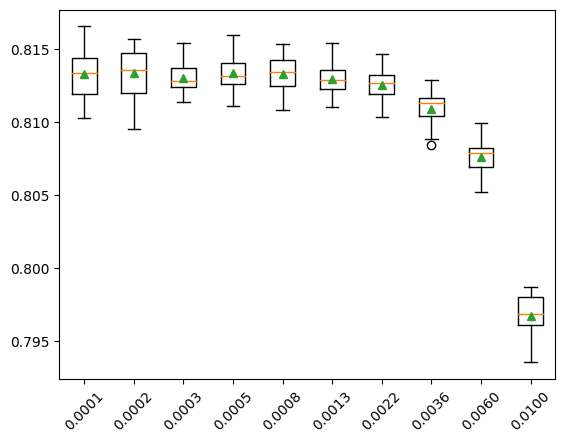

In [19]:
plt.boxplot(aucroc.T, showmeans=True)
plt.xticks(range(1, len(alfas) + 1), [f'{a:.4f}' for a in alfas], rotation=45)
plt.show()

Seleccionamos el valor de $\alpha$ más apropiado de acuerdo al desempeño en la validación cruzada.

In [20]:
a = alfas[aucroc.mean(axis=1).argmax()]
print(f'El valor de alfa que seleccionamos es {a:.4f}')

El valor de alfa que seleccionamos es 0.0002


Entrenamos un modelo con el valor seleccionado de $\alpha$ usando todo el subconjunto de entrenamiento y obtenemos las métricas de desempeño en el conjunto de prueba.

In [21]:
imp = SimpleImputer(strategy='mean')
imp.fit(Xe)
Xe = imp.transform(Xe)

sc = StandardScaler()
Xe = sc.fit_transform(Xe)

m = SGDClassifier(loss='log_loss',
                  penalty='l1',
                  alpha=a)
m = m.fit(Xe, ye)

X_prueba = imp.transform(X_prueba)
X_prueba = sc.transform(X_prueba)
y_pred = m.predict(X_prueba)
probs = m.predict_proba(X_prueba)

rvps, rfps = roc(probs[:, 1], y_prueba)
ps, rs, _ = precision_recall_curve(y_prueba, probs[:, 1])
print(f'AUCROC = {compute_aucroc(rfps, rvps):.3f}')
print(f'AUCPR = {auc(rs, ps):.3f}')
print(f'ACC = {accuracy_score(y_prueba, y_pred):.3f}')
print(f'Prec = {precision_score(y_prueba, y_pred):.3f}')
print(f'Recall = {recall_score(y_prueba, y_pred):.3f}')
print(f'f1 score = {f1_score(y_prueba, y_pred):.3f}')

AUCROC = 0.812
AUCPR = 0.672
ACC = 0.753
Prec = 0.676
Recall = 0.536
f1 score = 0.598


Graficamos la curva ROC.

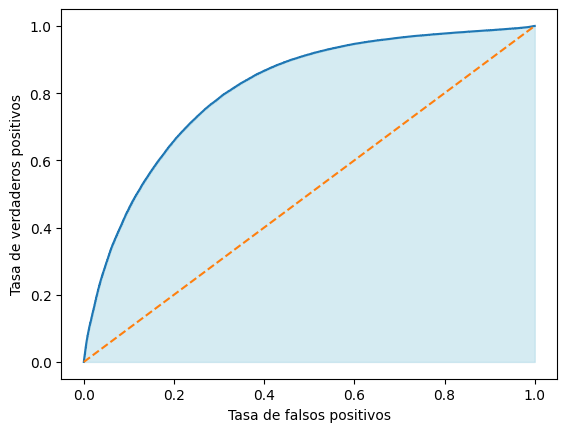

In [22]:
plt.plot(rfps, rvps)
plt.plot([0, 1], [0, 1], '--')
plt.fill_between(rfps, rvps, 0, alpha=0.5, color = 'lightblue')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.show()

Visualizamos el valor de los parámetros del modelo.

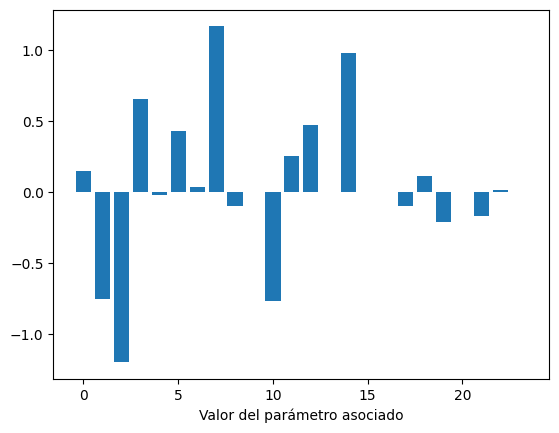

In [23]:
plt.bar(range(m.coef_[0].size), height=m.coef_[0])
plt.xlabel(u'Característica')
plt.xlabel(u'Valor del parámetro asociado')
plt.show()